## Stock Price Prediction Comparison between ARIMA, LSTM Model and Sentimenetal Anaysis

This notebook aims to compare the predictive performance of two prominent models for time series forecasting: ARIMA (AutoRegressive Integrated Moving Average) and LSTM (Long Short-Term Memory) networks. Both models are applied to the same dataset, which comprises the stock prices of Vanguard S&P 500 ETF (VOO). The comparison will focus on their methodology, data preparation, performance metrics, and overall suitability for stock price prediction.




---

### I. Methodology Overview

#### ARIMA Model

The ARIMA model is utilized for its capabilities in modeling non-stationary data through differencing, combining autoregressive and moving average components. The model parameters (p, d, q) are specifically chosen based on preliminary statistical testing, including the Augmented Dickey-Fuller test, to ensure stationarity.

#### LSTM Model

LSTM networks are chosen for their proficiency in capturing long-term dependencies in time series data. The network architecture includes multiple layers with dropout to prevent overfitting, and data normalization is applied to scale the feature values.

#### Sentimental Analysis 

< FOR INPUT >

---

### II. Data Preparation

Both ARIMA & LSTM models use the same dataset featuring daily stock metrics like Open, High, Low, Close, and Volume.

#### ARIMA Model

The data preparation involves checking for stationarity and applying differencing to make the series stationary.


#### LSTM Model

LThe dataset undergoes normalization using MinMaxScaler to ensure the data is well-suited for neural network training.

#### Sentimental Analysis 

< FOR INPUT >

<br/>

We can see that there are 7 columns, with 6 numeric variables and `Date` being the only categorical variable in the dataset. 

The important variables are `Open`, `High`, `Low` and `Close`, which are the four key data points used in financial markets, particularly in the context of stock market trading.

`Open`: The price at which a security first trades upon the opening of the trading day.  

`High`: The highest price at which a security trades during the trading day. 

`Low`: The lowest price at which a security trades during the trading day. 

`Close`: The final price at which a security trades at the end of the trading day. 

<br/>

In both analysis, we will be only focusing on using `Date` as a predictor for `Close`, which is the response variable.

---

### III. Exploratory Data Analysis

Both the ARIMA and LSTM notebooks employ a range of techniques to understand and visualize the dataset’s characteristics. Although their methodologies involve different tools and visualizations, there are notable similarities in their analytical approach, particularly in focusing on trends, seasonality, and volatility in the stock prices of Vanguard S&P 500 ETF (VOO). Here’s a detailed comparison and explanation of the EDA similarities


#### Common Objectives
Trend Analysis: 
Both models analyze the stock price trends over time. This is crucial for any time series forecasting as it helps in understanding the general direction in which the stock prices are moving, which can influence the parameter settings in ARIMA (like the order of differencing) and the architecture of the LSTM (like the number of neurons in layers).

Volatility Analysis: 
Understanding volatility is key to financial time series analysis. Both notebooks examine how stock prices fluctuate over a given period. This analysis helps in setting up risk management strategies and in understanding the stability of the dataset.

#### Visualization Techniques
Moving Averages: 
Both notebooks utilize moving averages to smooth out the series and to visualize the long-term trend more clearly. In the ARIMA notebook, moving averages are used to identify potential stationary transformations and to decide the differencing degree. The LSTM notebook uses moving averages to establish a baseline understanding of the trend which helps in designing the LSTM layers to better capture these dependencies.

Line Charts: 
Simple line charts are common in both notebooks for visualizing the stock prices and moving averages over time. These charts are straightforward for identifying trends and seasonality effects in the data, which are critical for both ARIMA and LSTM models.

#### Analysis of Statistical Properties
Stationarity: 
In the ARIMA notebook, stationarity is a critical analysis because ARIMA models require stationary data to function correctly. The LSTM notebook, while not requiring stationarity, still benefits from understanding whether the series exhibits stationary characteristics, as it can impact how the model learns long-term dependencies.

Correlation Analysis: 
Both notebooks likely perform some form of correlation analysis to understand the relationships between different features of the dataset (e.g., Open, High, Low, Close prices). The correlation analysis helps in feature selection and in understanding which variables carry the most predictive power, which informs the input features for both models.
Use of Plots

Volatility Plots: These might be explicitly detailed in the ARIMA notebook through the plotting of residuals or volatility over time and are inferred in the LSTM notebook through the analysis of high-low spreads or similar measures.

Seasonality Checks: While more implicit in LSTM, both approaches need to account for seasonality, especially in financial data where cyclical patterns are common. ARIMA models might use ACF and PACF plots to determine seasonal orders, whereas LSTMs implicitly capture these through their network structure but still benefit from initial visual seasonality assessments.

<br/>
EXAMPLE 

#### Multi-variate Exploration

A correlation matrix is useful in determining the dependency of each pair of variables in the dataset. Here, we want to find out whether the `OHLC` values are strongly correlated to each other, and whether `Volume` has any effect on the other variables.

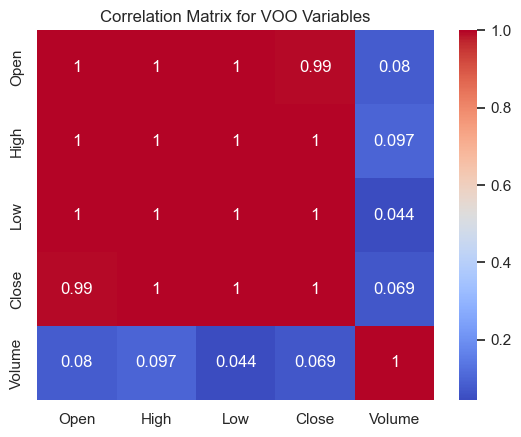

In [9]:
# Draw correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for VOO Variables')
plt.show()

From this heatmap, we can conclude that the `Open`, `High`, `Low`, and `Close` values are highly correlated with each other for VOO, meaning they tend to move together during the trading period. However, `Volume` does not strongly correlate with price movement, indicating that for VOO, volume changes are not necessarily associated with large changes in price. This can be useful information for trading strategies that might, for example, use volume as an indicator independent of price movements.

<br/>

#### Further Exploration

In order to further understand the data, we will plot two charts on the:

- Closing Price and Moving Averages
- Daily Returns and Volatility

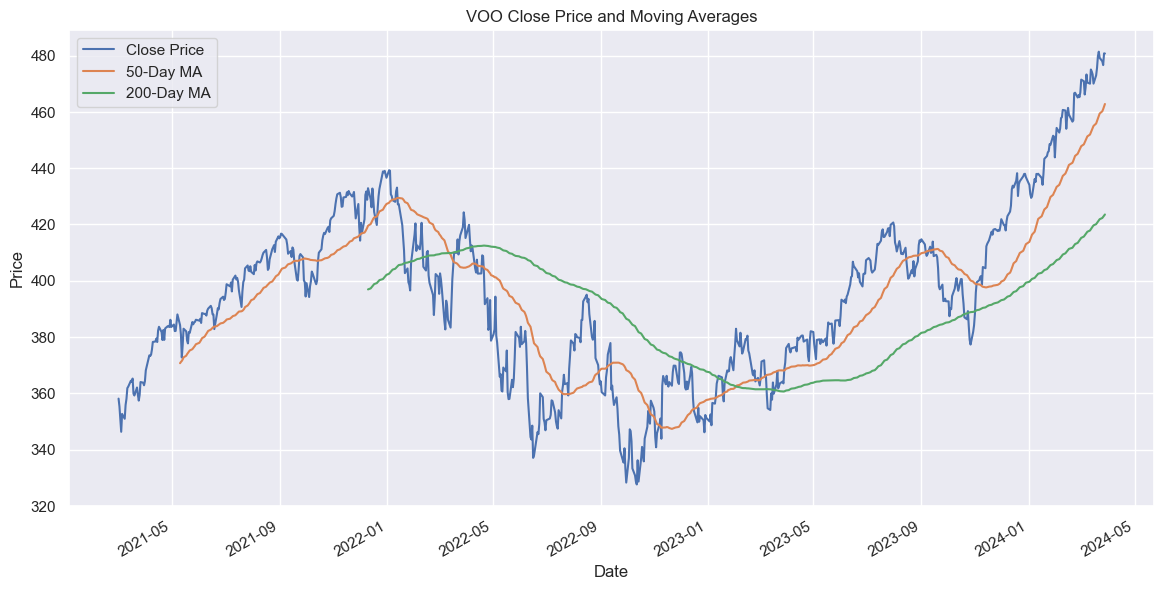

In [10]:
plt.figure(figsize=(14, 7))

# Plotting the Closing Price
df['Close'].plot(label='Close Price')

# Short-term (50-day) and Long-term (200-day) Moving Averages
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day MA')
df['MA200'].plot(label='200-Day MA')

plt.title('VOO Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In the chart, `MA200` (200-day moving average) starts later than `MA50` (50-day moving average) and the closing price line. This happens because a 200-day moving average requires 200 days of data before the first value can be calculated. Therefore, the MA200 line will begin to appear on the chart only after the first 200 days.

The 200-day moving average is used to determine the **long-term market trend** and smooth out price fluctuations. It's slower to respond to price changes than the 50-day moving average because it considers a larger set of data, which is why it appears smoother and starts later in the chart.

The overall chart shows the closing price of VOO, along with the short-term (`MA50`) and long-term (`MA200`) trends. The `MA50` line reacts more quickly to recent price changes, while the `MA200` provides a more gradual trend line that reflects longer-term price movements. When the closing price dips below these averages, it could be seen as a bearish signal, and when it's above, it could be bullish. The intersection points where the closing price or `MA50` crosses the `MA200` can be of particular interest to traders looking for trend reversals.

<br/>

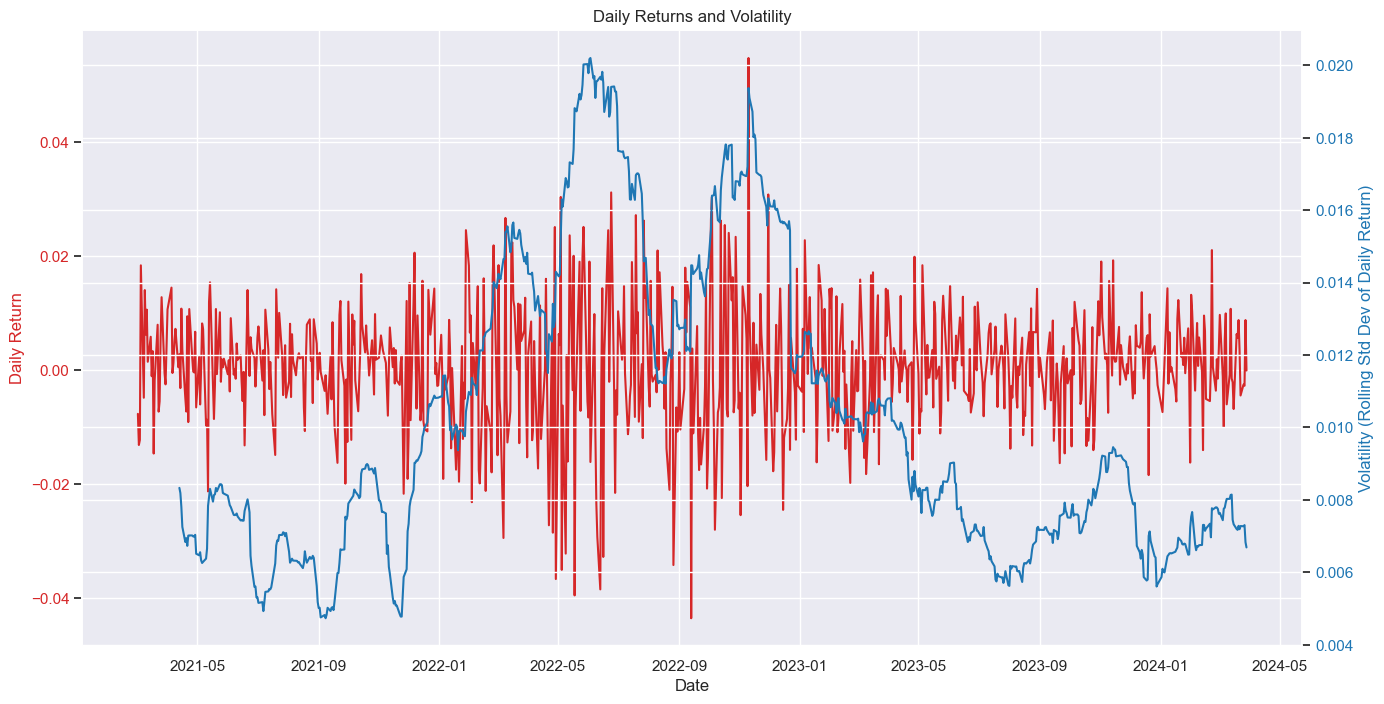

In [11]:
df['Daily Return'] = df['Close'].pct_change()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Return', color=color)
ax1.plot(df.index, df['Daily Return'], color=color, label='Daily Return')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volatility (Rolling Std Dev of Daily Return)', color=color)  
ax2.plot(df.index, df['Daily Return'].rolling(window=30).std(), color=color, label='Rolling 30-Day Std Dev')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Daily Returns and Volatility')
plt.show()

When the red line moves sharply away from the zero line, it indicates significant price changes from the previous day. Peaks and troughs in the blue line show periods of high and low volatility, respectively. A higher blue line indicates that the price of the asset was fluctuating more during that period, signaling higher risk. Conversely, a lower blue line indicates less fluctuation and lower risk. 

One can also look for patterns or correlations between the two lines. For instance, if large spikes in daily returns (red line) coincide with peaks in volatility (blue line), it suggests that higher returns are associated with higher risk. It's also noteworthy to see if periods of increased volatility lead or follow large changes in daily returns, which might inform a trading strategy or risk management approach. 

This kind of chart is particularly useful for traders and investors who wish to understand the risk-return profile of an asset over time and might be used to make decisions about timing entries and exits into the market.

<br/>

#### Stationarity Test

Finally, we check the stationarity of the data using the Augmented Dickey-Fuller (ADF) test. The ADF test hypothesis is:

- Null Hypothesis (H0): The time series is non-stationary (presence of unit root).
- Alternative Hypothesis (H1): The time series is stationary. 

In [12]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import ADFTest

# Constant for degree of accuracy
DP = 4

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_close)

# Get the p-value
p_value = result[1]
print("p-value:", round(p_value, DP))

# Check if the series is stationary
if p_value <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

p-value: 0.7566
The series is non-stationary.


The p-value from the ADF test is greater than the 0.05 significance level. Thus, we fail to reject the null hypothesis, and need to apply differencing to make the series stationary.

---

### IV. Model Training

Let us visualise the stock prices, differentiating between the Train and Test set data with different colours.

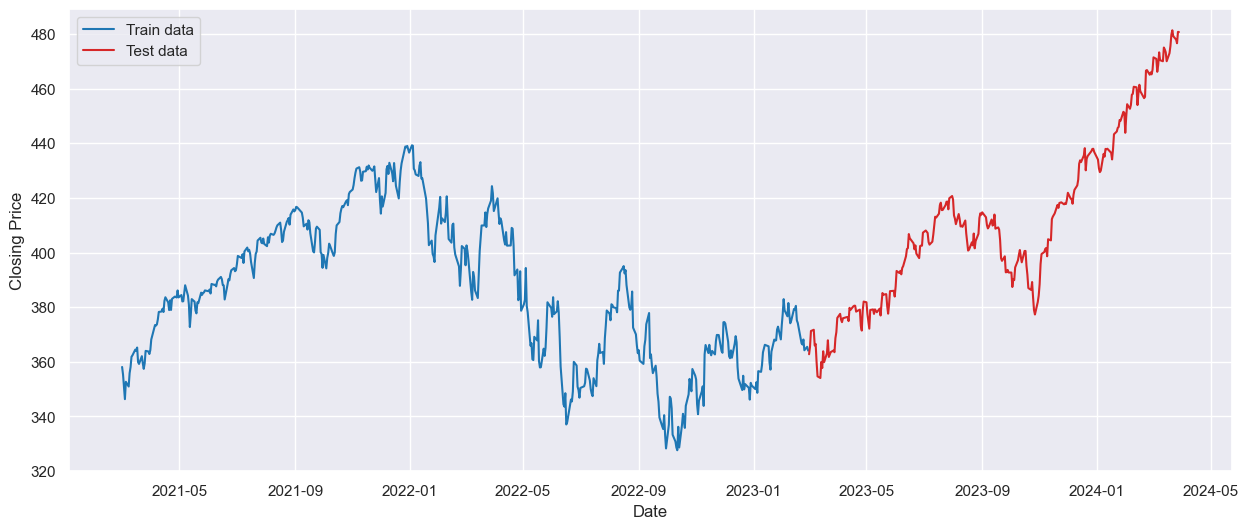

In [50]:
# Train-test split
train_df = df_close[:'2023-02-28'] # Training data until end of February 2023
test_df = df_close['2023-03-01':] # Test data starting from March 2023

# Draw a line chart for the dataset
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_df, color='tab:blue', label='Train data')
plt.plot(test_df, color='tab:red', label='Test data')
plt.legend()
plt.show()

<br/>

Since the ARIMA model requires the data to be stationary, we expect that the data has to be differenced before the modelling process. We use the `auto_arima` function to search for the best parameters based on a predefined criterion, which is AIC by default. 

The Akaike Information Criterion (AIC) is a measure of the goodness of fit of the ARIMA model. It balances the trade-off between the goodness of fit and the complexity of the model, that is, the number of parameters used.

In [51]:
from pmdarima import auto_arima

# Using Auto ARIMA to find the best model 
model = auto_arima(train_df, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2969.124, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2963.297, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2965.207, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2965.198, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2961.300, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2965.594, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.212 seconds


From the output, we can see that the best model selected by `auto_arima` is `ARIMA(0,1,0)(0,0,0)[0]`.

Just as we expected, the order of differencing (d) is equal to 1 as the data is non-stationary. All other parameters are zero as the model does not account for any seasonal patterns in the data.

---

### V. Model Building 

#### ARIMA Model Building

Parameter Selection: The ARIMA model relies heavily on the selection of its parameters p, d, and q, which represent the autoregressive, differencing, and moving average components, respectively. The choice of these parameters is typically informed by statistical tests such as the Augmented Dickey-Fuller (ADF) test to achieve stationarity, and the examination of autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to determine the appropriate lags for p and q

Model Fitting: Once the parameters are selected, the ARIMA model is fitted to the historical data. This fitting process involves estimating the coefficients of the time series model in a way that minimizes forecast errors. It is a comparatively straightforward computational process, primarily handled by statistical libraries like Statsmodels in Python.

Diagnostics: After fitting the model, diagnostic checks are performed to validate the adequacy of the model fitting. This includes analyzing the residuals to ensure they resemble white noise, indicating that the model has adequately captured the information in the data without overfitting.

#### LSTM Model Building

Network Architecture: Unlike ARIMA, which is a linear model with clearly defined mathematical parameters, LSTM involves setting up a neural network architecture. This includes deciding the number of LSTM layers, the number of units in each layer, the use of dropout for regularization to prevent overfitting, and the sequence length for inputs.

Data Preprocessing: LSTM requires data normalization or standardization as part of its preprocessing to help the network learn more effectively. Typically, data is scaled to a range like 0 to 1 using MinMaxScaler, which helps in stabilizing the training process.

Training Process: Training an LSTM involves backpropagation through time and requires a significant amount of computational resources, especially with large datasets. It includes setting up epochs, batch sizes, and often involves techniques such as early stopping and callbacks to optimize training and prevent overfitting.

Evaluation Metrics: While both models might use similar metrics such as RMSE (Root Mean Squared Error) for evaluation, the LSTM model may also utilize other advanced metrics like Mean Absolute Percentage Error (MAPE) or custom metrics relevant to deep learning models.

#### Key Differences in Approach
Parameterization vs. Architecture: ARIMA’s approach is heavily statistical and involves significant emphasis on parameter selection based on the data’s statistical properties. In contrast, LSTM requires architectural decisions about the network’s depth, complexity, and training regimen.

Linear vs. Non-linear Modeling: ARIMA models the data through a linear equation of its differentiated series, suitable for simpler or seasonal time series. LSTM models the data through layers of non-linear transformations, which allows it to capture more complex patterns and relationships in the data.

Computational Intensity: Typically, ARIMA models are less computationally intensive than LSTM models, which require substantial computational resources for training, especially with large datasets and deep networks.


---

### VI. Model Evaluation

In this final section, we will evaluate the performance of our ARIMA model based on the following metrics:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)
- Coefficient of Determination (R^2)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

# Compute and print performance metrics
mse = mean_squared_error(test_df, predictions)
print('Mean Squared Error (MSE)\t\t: ', round(mse, DP))

rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE)\t\t: ', round(rmse, DP))

mape = mean_absolute_percentage_error(test_df, predictions)
print('Mean Absolute Percentage Error (MAPE)\t: ', round(mape, DP), '%')

r2 = r2_score(test_df, predictions)
print('Coefficient of Determination (R^2)\t: ', round(r2, DP))

Mean Squared Error (MSE)		:  9.6799
Root Mean Squared Error (RMSE)		:  3.1113
Mean Absolute Percentage Error (MAPE)	:  0.006 %
Coefficient of Determination (R^2)	:  0.9901


The RMSE, expressed as a percentage of the mean VOO price, is calculated below:

In [74]:
mean = np.mean(test_df)
rmse_percentage = (rmse / mean) * 100
print('RMSE as a percentage of the mean VOO price: ', round(rmse_percentage, DP), '%')

RMSE as a percentage of the mean VOO price:  0.7572 %


<br/>

---